In [1]:
!pip install -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## Задание 1

На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. 

Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). 

**Подсказка:** вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. 

**Дополнительный вопрос:** можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение `messi5.jpg`

In [8]:
from typing import Tuple

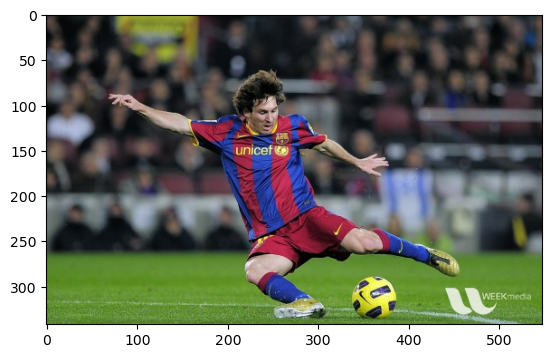

In [22]:
image = cv.imread('images/messi5.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [23]:
def get_rotation_matrix(corner_point: Tuple[int, int], angle: float) -> np.ndarray:
    """
    Get rotation matrix, that rotate the image around corner point.
    Params:
        corner_point - Image will rotated around it point.
        angle        - Angles in radians.
    """
    A = np.float32([
        [1,   0,  -corner_point[0]],
        [0,   1,  -corner_point[1]],
        [0,   0,                 1]
    ])

    B = np.float32([
        [cos(angle), -sin(angle),  0],
        [sin(angle),  cos(angle),  0],
        [         0,           0,  1]]
    )

    C = np.float32([
        [1,   0,   corner_point[0]],
        [0,   1,   corner_point[1]],
        [0,   0,                 1]
    ])
    
    return A @ B @ C


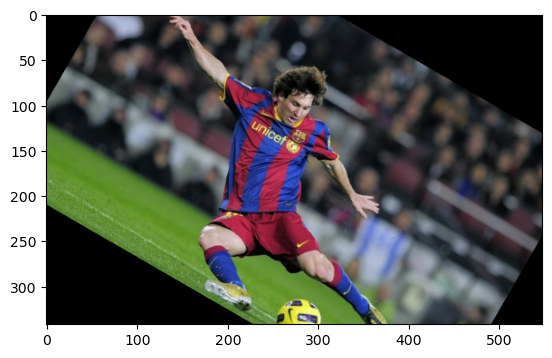

In [24]:
height, width, channels = image.shape

# Rotate 30 degrees
angle = 30.0 * np.pi / 180.0

# Rotate around center
corner_point = -width / 2, -height / 2

# Create warp matrix and apply transform
warp_matrix = get_rotation_matrix(corner_point, angle)

result = cv.warpAffine(image, warp_matrix[0:2], (width, height))

# Show the result
plt.imshow(result)
plt.show()

## Задание 2

В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

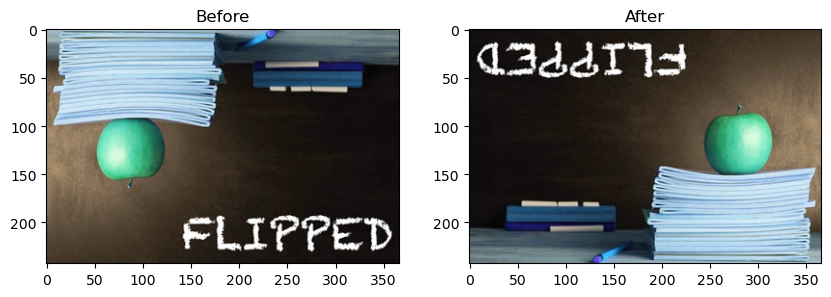

In [30]:
image = cv.imread('images/apple.jpg')
image = cv.cvtColor(apple, cv.COLOR_BGR2RGB)

height, width, channels = image.shape

# Rotate 30 degrees
angle = 180.0 * np.pi / 180.0

# Rotate around center
corner_point = -width / 2, -height / 2

# Create warp matrix and apply transform
warp_matrix = get_rotation_matrix(corner_point, angle)

result = cv.warpAffine(image, warp_matrix[0:2], (width, height))

# Show the result
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))
ax[0].set_title("Before")
ax[0].imshow(image)

ax[1].imshow(result)
ax[1].set_title("After")
plt.show()

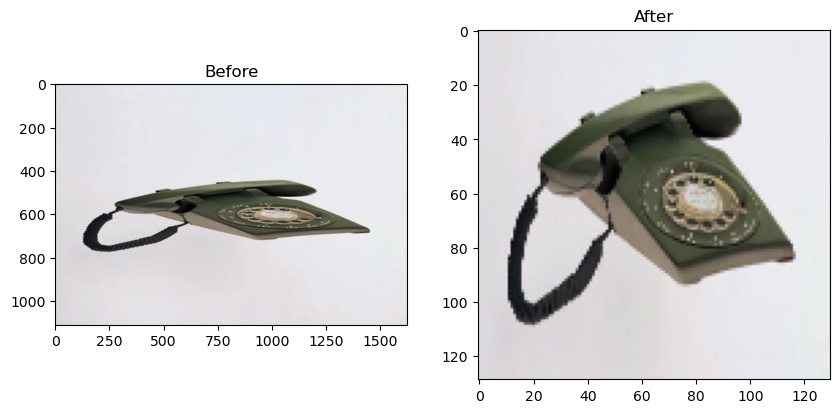

In [45]:
image = cv.imread('images/phone.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

height, width, channels = image.shape

Yrange = (100, -70)
Xfactor = 0.08
Yfactor = 0.27

Rs = np.float32([
    [Xfactor,       0, 0],
    [      0, Yfactor, 0]
])

dst_size = (
    int(width  * Xfactor),
    int(height * Yfactor)
)

result = cv.warpAffine(image, Rs, dst_size)
result = result[Yrange[0]:Yrange[1], :, :]

# Show the result
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))
ax[0].set_title("Before")
ax[0].imshow(image)

ax[1].imshow(result)
ax[1].set_title("After")
plt.show()

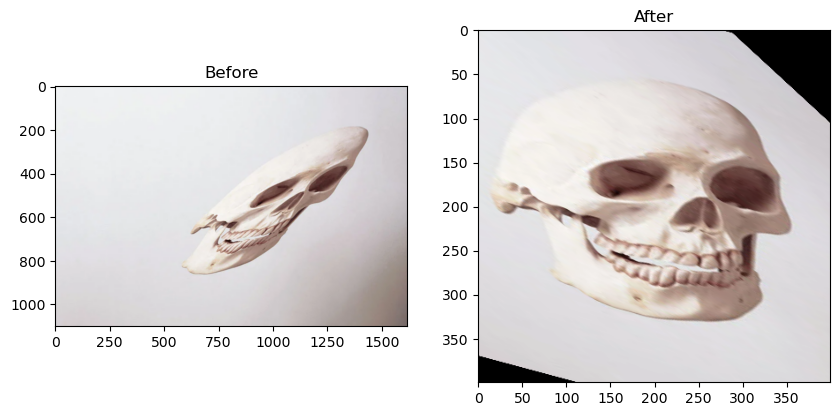

In [72]:
image = cv.imread('images/skull.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

height, width, channels = image.shape

corner_pt = -width / 2, -height / 2
rotation_matrix = get_rotation_matrix(corner_pt, -30 * np.pi / 180)

Rs = np.float32([
    [ 0.5, 0.25, 0.0],
    [ 0.5,  0.8, 0.0],
    [ 0.0,  0.0, 1.0]
])

T = np.float32([
    [1, 0, -650],
    [0, 1, -770],
    [0, 0, 1]
])


warp_matrix = T @ rotation_matrix @ Rs

result = cv.warpAffine(image, warp_matrix[0:2], (400, 400))

# Show the result
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))
ax[0].set_title("Before")
ax[0].imshow(image)

ax[1].imshow(result)
ax[1].set_title("After")
plt.show()

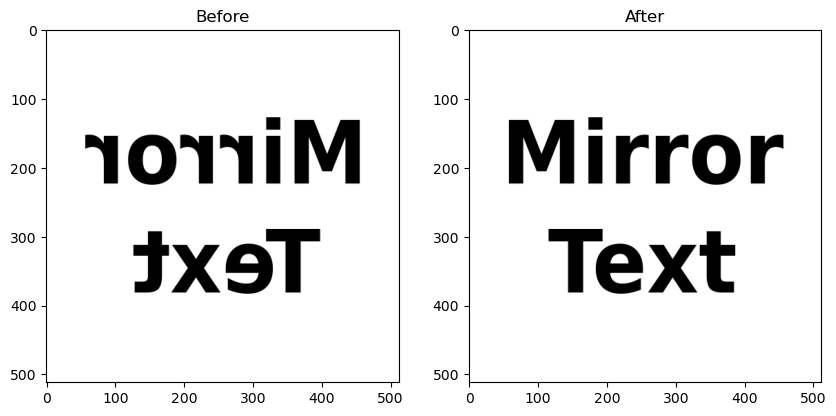

In [73]:
image = cv.imread('images/text.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

height, width, channels = image.shape

Rs = np.float32([
    [ -1.0, 0.0, width],
    [  0.0, 1.0,   0.0]
])

result = cv.warpAffine(image, Rs, (width, height))

# Show the result
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))
ax[0].set_title("Before")
ax[0].imshow(image)

ax[1].imshow(result)
ax[1].set_title("After")
plt.show()